In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as f

In [68]:
K = 4096 * 4
t = torch.linspace(start=1.7 * torch.pi, end=131.2 * torch.pi, steps=K)
tK = t[-1] - t[0]
tK

tensor(406.8362)

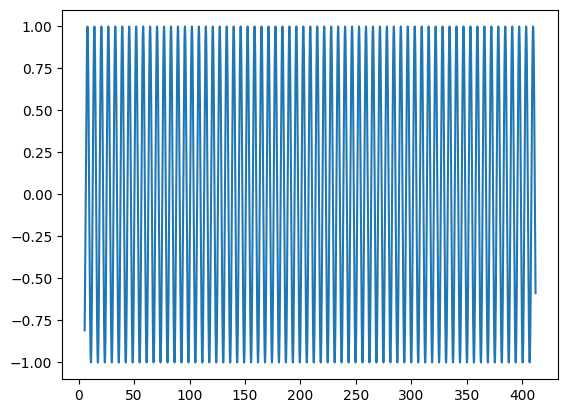

In [69]:
x = torch.sin(t)
plt.plot(t, x)

In [70]:
T = t[1] - t[0]
T

tensor(0.0248)

In [71]:
L = 16
tL = t[0] + L * T
tL

tensor(5.7380)

In [72]:
F = 16
tF = t[0] + F * T
tF

tensor(5.7380)

In [73]:
def freq_with_max_amp():
    return 1 / (2 * torch.pi)


phi = freq_with_max_amp()
phi

0.15915494309189535

In [74]:
tau = 1 / phi

tau

6.283185307179586

In [75]:
n_tau = tau // T
n_tau = int(n_tau.item())
n_tau

253

In [76]:
m = 3
tP = tL + m * tau
tP

tensor(24.5876)

In [77]:
delta_ta = t[-1] - t[0] - tF - tP
delta_ta

tensor(376.5106)

In [78]:
N = delta_ta // tP
N = int(N.item())
N

15

In [79]:
use_cuda = True
device = torch.device("cuda:0" if use_cuda and torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [80]:
l = nn.Linear(in_features=(m + 1) * L, out_features=F)
l = l.to(device=device)
l

Linear(in_features=64, out_features=16, bias=True)

第0批开始训练
loss=tensor(0.3680, device='cuda:0', grad_fn=<MseLossBackward0>)
第1批开始训练
loss=tensor(0.2760, device='cuda:0', grad_fn=<MseLossBackward0>)
第2批开始训练
loss=tensor(0.2024, device='cuda:0', grad_fn=<MseLossBackward0>)
第3批开始训练
loss=tensor(0.1447, device='cuda:0', grad_fn=<MseLossBackward0>)
第4批开始训练
loss=tensor(0.1011, device='cuda:0', grad_fn=<MseLossBackward0>)
第5批开始训练
loss=tensor(0.0699, device='cuda:0', grad_fn=<MseLossBackward0>)
第6批开始训练
loss=tensor(0.0492, device='cuda:0', grad_fn=<MseLossBackward0>)
第0批开始训练
loss=tensor(0.1576, device='cuda:0', grad_fn=<MseLossBackward0>)
第1批开始训练
loss=tensor(0.1136, device='cuda:0', grad_fn=<MseLossBackward0>)
第2批开始训练
loss=tensor(0.0785, device='cuda:0', grad_fn=<MseLossBackward0>)
第3批开始训练
loss=tensor(0.0524, device='cuda:0', grad_fn=<MseLossBackward0>)
第4批开始训练
loss=tensor(0.0348, device='cuda:0', grad_fn=<MseLossBackward0>)
第5批开始训练
loss=tensor(0.0246, device='cuda:0', grad_fn=<MseLossBackward0>)
第6批开始训练
loss=tensor(0.0206, device='cuda:0', grad_f

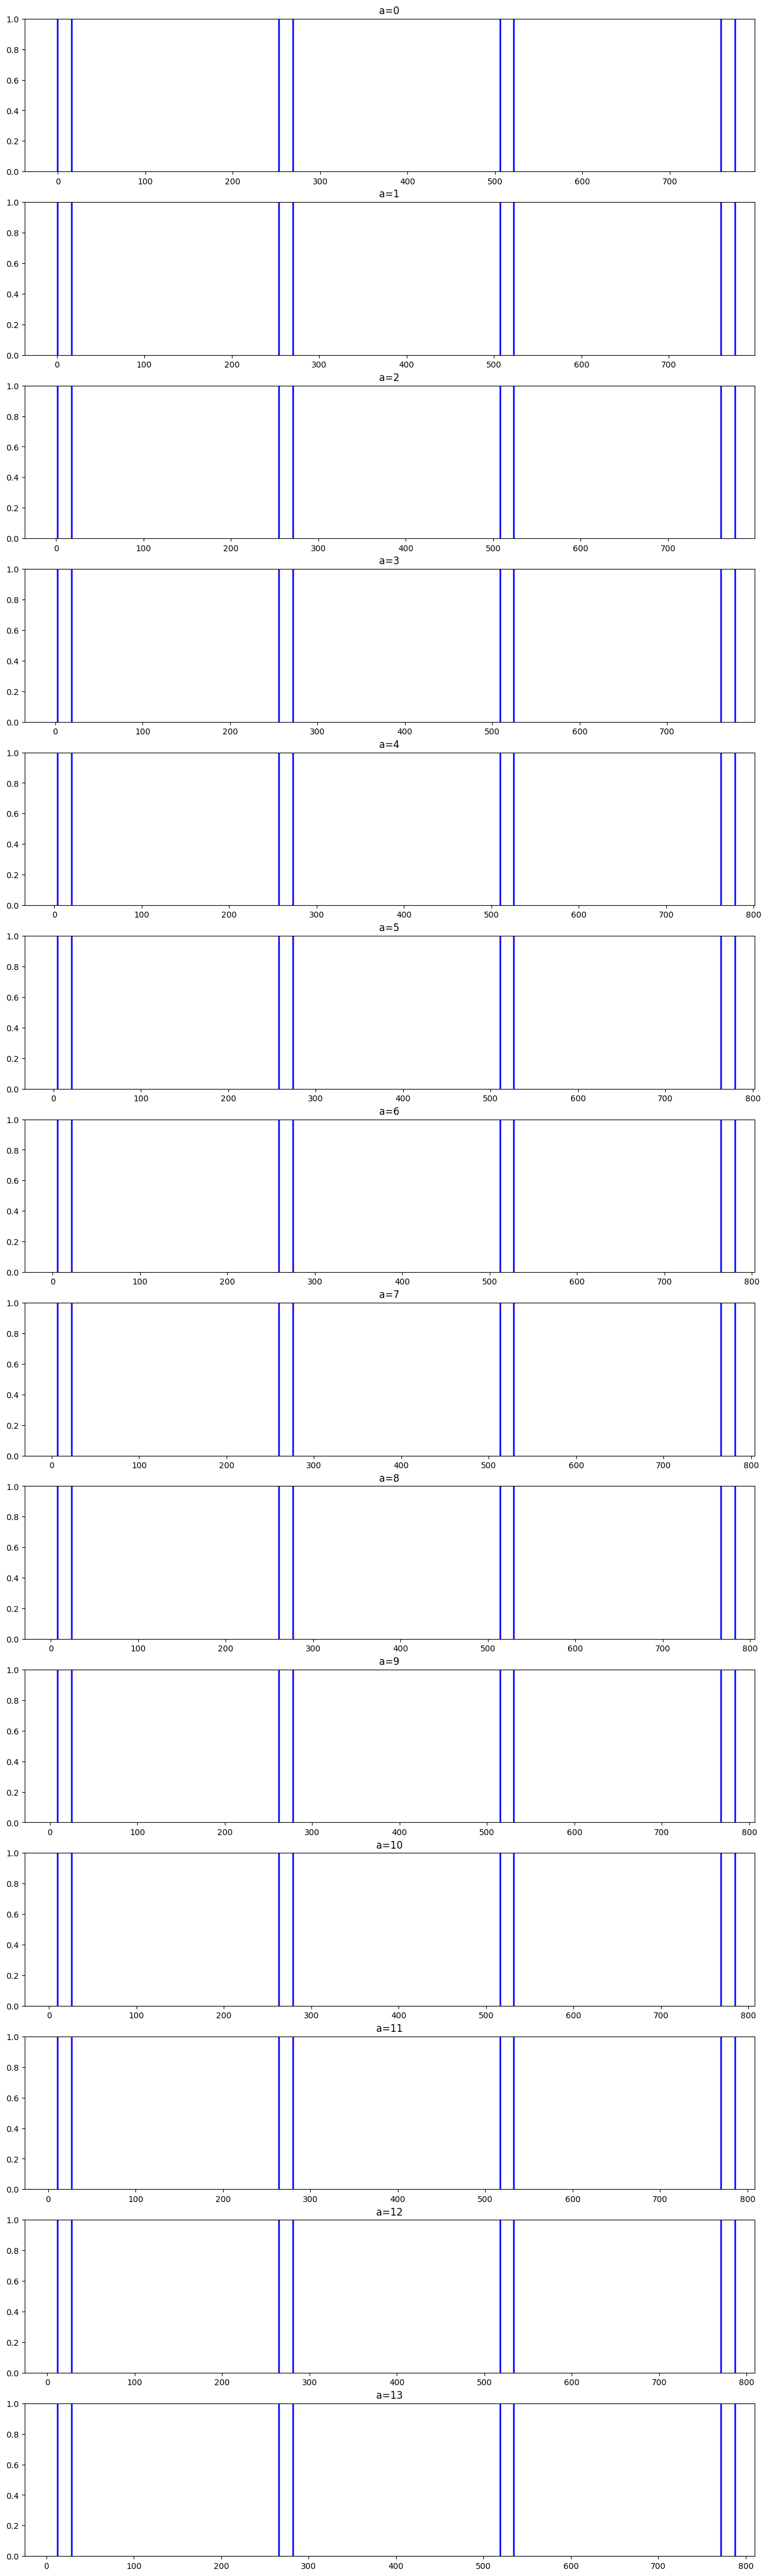

In [81]:
n = 2
B = N // n

plt.figure(figsize=(16, 4 * N))


optim = torch.optim.Adam(l.parameters(), lr=0.001)
criterion = nn.MSELoss()

total_loss = []

for epoch in range(10):
    loss = None
    for i in range(B):
        print(f"第{i}批开始训练")
        X = []
        Y = []
        # 组装每批的数据
        for j in range(n):
            a = i * n + j
            b = a + L + m * n_tau
            c = b + F
            plt.subplot(N, 1, a + 1)
            all_segments = []
            # segments
            for k in range(m + 1):
                starts = a + k * n_tau
                plt.axvline(x=starts, color="blue")
                ends = a + L + k * n_tau
                plt.axvline(x=ends, color="blue")
                all_segments.append(x[starts:ends])
            x_line = torch.cat(all_segments)
            X.append(x_line)
            plt.title(f"{a=}")
            y_line = x[b:c]
            Y.append(y_line)
        # 每批的数据
        X = torch.stack(X).to(device=device)
        Y = torch.stack(Y).to(device=device)
        Y_pred = l(X)
        loss: torch.Tensor = criterion(Y_pred, Y)
        print(f"{loss=}")
        optim.zero_grad()
        loss.backward()
        optim.step()

    total_loss.append(loss.item())

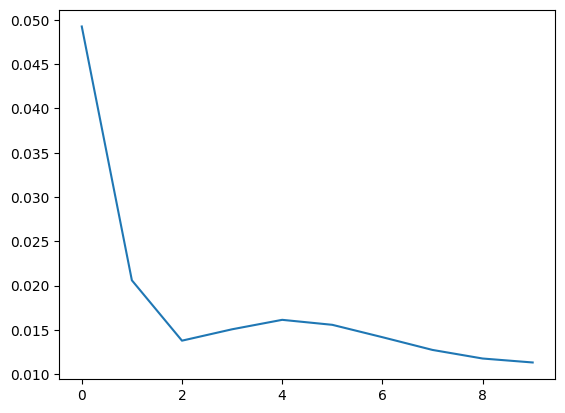

In [82]:
plt.plot(total_loss)